# Assignment 1: Panoramic Image Stitching

## Part 1

In [1]:
#Imports
import matplotlib.pyplot as plt
import cv2
import numpy as np
#Importation des images
img = cv2.imread('./im01.jpg')

sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(img,None)
img_result=cv2.drawKeypoints(img,kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoints.jpg',img_result)

True

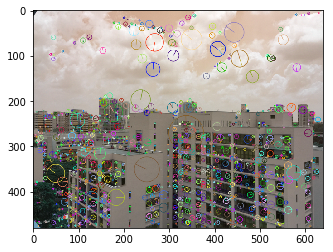

In [2]:
#plt.imshow inverts frequences, the image itself is not inverted

plt.imshow(img_result)

## Part 2

In [3]:
img2 = cv2.imread('./im02.jpg')
img3 = cv2.imread('./im03.jpg')

In [4]:
# Initiate ORB detector
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with ORB
kp1, des1 = sift.detectAndCompute(img2,None)
kp2, des2 = sift.detectAndCompute(img3,None)

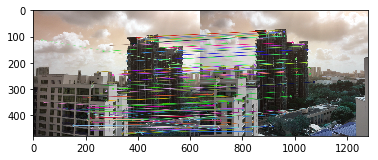

In [5]:
# create BFMatcher object
bf = cv2.BFMatcher(crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches_sorted = sorted(matches, key = lambda x:x.distance)
result = cv2.drawMatches(img2,kp1,img3,kp2,matches_sorted[200:300],None,flags=2)
plt.imshow(result)
plt.show()

In [6]:
cv2.imwrite('100_match.jpg',result)

True

#### Wrong Match

In [7]:
img2 = cv2.imread('./im02.jpg')
img3 = cv2.imread('./im03.jpg')

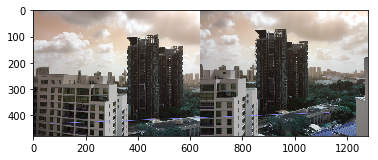

In [8]:
img4 = cv2.drawMatches(img2,kp1,img3,kp2,matches_sorted[500:501],None,flags=2)
plt.imshow(img4)
plt.show()

In [9]:
cv2.imwrite('Error_Match.jpg',img4)

True

<BarContainer object of 128 artists>

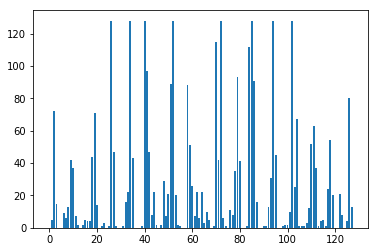

In [10]:
Index1=matches_sorted[500].queryIdx
plt.bar(np.arange(len(des1[Index1])),des1[Index1])

<BarContainer object of 128 artists>

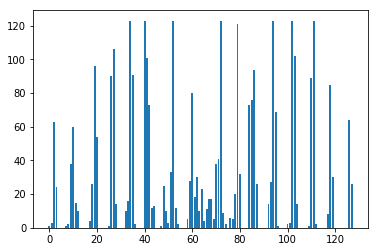

In [11]:
Index2=matches_sorted[500].trainIdx
plt.bar(np.arange(len(des2[Index2])),des2[Index2])

In [12]:
print('Distance of the good match : ', matches_sorted[500].distance)

Distance of the good match :  236.7445831298828


#### Good Match

In [13]:
img2 = cv2.imread('./im02.jpg')
img3 = cv2.imread('./im03.jpg')

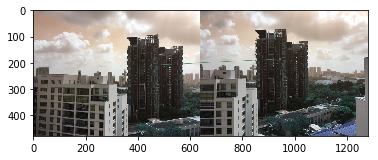

In [14]:
img5 = cv2.drawMatches(img2,kp1,img3,kp2,matches_sorted[11:12],None,flags=2)
plt.imshow(img5)
plt.show()

In [15]:
cv2.imwrite('Good_match.jpg',img5)

True

In [16]:
Index1_goodMatch=matches_sorted[11].queryIdx
Index2_goodMatch=matches_sorted[11].trainIdx

<BarContainer object of 128 artists>

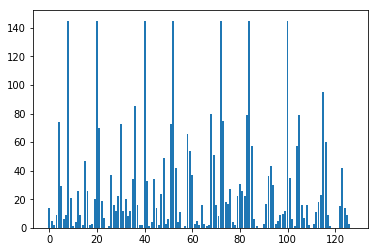

In [17]:
plt.bar(np.arange(len(des1[Index1_goodMatch])),des1[Index1_goodMatch])

<BarContainer object of 128 artists>

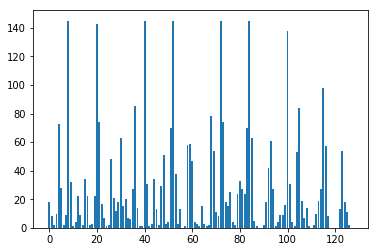

In [18]:
plt.bar(np.arange(len(des2[Index2_goodMatch])),des2[Index2_goodMatch])

In [19]:
print('Distance of the good match : ', matches_sorted[11].distance)

Distance of the good match :  43.89760971069336


## Part 3

In this part, I made a gui user interface using tkinter. 

In [20]:
!python gui_fix.py

x coordinates : 484, y coordinates : 301
Second image
[(484, 301)]
x coordinates : 321, y coordinates : 284
Second image
[(484, 301), (321, 284)]
x coordinates : 318, y coordinates : 338
Second image
[(484, 301), (321, 284), (318, 338)]
x coordinates : 294, y coordinates : 345
Second image
[(484, 301), (321, 284), (318, 338), (294, 345)]
x coordinates : 578, y coordinates : 259
First image
pyimage7
[(578, 259)]
x coordinates : 617, y coordinates : 259
First image
pyimage8
[(578, 259), (617, 259)]
x coordinates : 617, y coordinates : 319
First image
pyimage9
[(578, 259), (617, 259), (617, 319)]
x coordinates : 578, y coordinates : 330
First image
pyimage10
[(578, 259), (617, 259), (617, 319), (578, 330)]
x coordinates : 290, y coordinates : 283
Second image
[(484, 301), (321, 284), (318, 338), (294, 345), (290, 283)]
im_out (480, 640, 3)


## Part 4

In [22]:
!python gui_img.py

x coordinates : 292, y coordinates : 286
First image
pyimage3
[(292, 286)]
x coordinates : 323, y coordinates : 283
First image
pyimage4
[(292, 286), (323, 283)]
x coordinates : 320, y coordinates : 338
First image
pyimage5
[(292, 286), (323, 283), (320, 338)]
x coordinates : 292, y coordinates : 347
First image
pyimage6
[(292, 286), (323, 283), (320, 338), (292, 347)]
x coordinates : 577, y coordinates : 260
Second image
[(577, 260)]
x coordinates : 618, y coordinates : 259
Second image
[(577, 260), (618, 259)]
x coordinates : 618, y coordinates : 323
Second image
[(577, 260), (618, 259), (618, 323)]
x coordinates : 577, y coordinates : 326
Second image
[(577, 260), (618, 259), (618, 323), (577, 326)]


## Part 5

In [23]:
!python gui_ransac.py

## Part 6

In [24]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [25]:
img1 = cv2.imread('./im01.jpg')
img2 = cv2.imread('./im02.jpg')
img3 = cv2.imread('./im03.jpg')

In [26]:
images=[img1,img2,img3]

In [27]:
def points(img1,img2):
    sift = cv2.xfeatures2d.SIFT_create()
    kp1,des1 = sift.detectAndCompute(img1,None)
    kp2,des2=sift.detectAndCompute(img2,None)
    bf = cv2.BFMatcher(crossCheck=True)
    
    matches = bf.match(des1,des2)
    
    matches_sorted = sorted(matches, key = lambda x:x.distance)
    
    new_image = cv2.drawMatches(img1,kp1,img2,kp2,matches_sorted[0:100],None,flags=2)
    plt.imshow(new_image)
    plt.show()
    src=[]
    dest=[]
    for match in matches_sorted[:100]:
        kp_img1=kp1[match.queryIdx]
        kp_img2=kp2[match.trainIdx]
        src.append((kp_img1.pt[0],kp_img1.pt[1]))
        dest.append((kp_img2.pt[0],kp_img2.pt[1]))   

    return([src,dest])

In [30]:
def homography(img1,img2):
    src,dest=points(img2,img1)
    h, status = cv2.findHomography(np.array(src), np.array(dest),cv2.RANSAC, 5.0)
    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]

    l_points = np.float32([[0,0], [0,rows1], [cols1, rows1], [cols1,0]]).reshape(-1,1,2)
    temp_points = np.float32([[0,0], [0,rows2], [cols2, rows2], [cols2,0]]).reshape(-1,1,2)

    points2 = cv2.perspectiveTransform(temp_points, h)
    l_points = np.concatenate((l_points, points2), axis=0)

    [x_min, y_min] = np.int32(l_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(l_points.max(axis=0).ravel() + 0.5)

    translation_dist = [-x_min, -y_min]
    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0,0,1]])
    X=x_max-x_min
    Y=y_max-y_min
    h=H_translation.dot(h)
    return(h,X,Y)

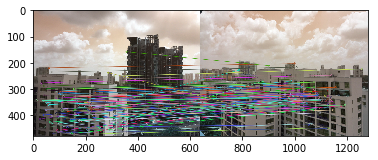

In [31]:
h,X,Y=homography(img1,img2)

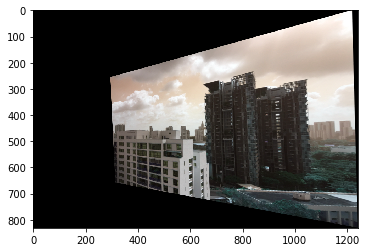

In [32]:
im_out = cv2.warpPerspective(images[1],h,(X, Y))
transition_image=im_out.copy()
plt.imshow(im_out)

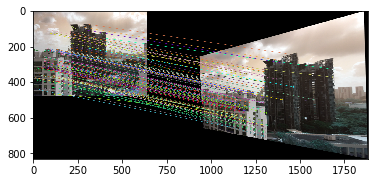

In [33]:
h2,X2,Y2=homography(transition_image,images[2])

In [34]:
result = cv2.warpPerspective(images[2],h2,(X2, Y2))

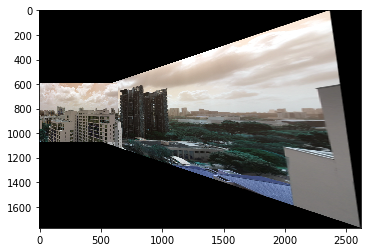

In [35]:
result[transition_image.shape[0]-images[0].shape[0]//2:transition_image.shape[0]+images[0].shape[0]//2,0:img1.shape[1]] = images[0]
plt.imshow(result)